# Structured Meshes

In [ ]:
import numpy as np
from pprint import pprint
from lucifex.mesh import rectangle_mesh
from lucifex.fem import Function
from lucifex.viz import plot_colormap, create_animation, plot_line
from lucifex.utils import grid, cross_section, log_texec
from lucifex.io import write, get_ipynb_file_name

Nx = 256
Ny = 256
mesh = rectangle_mesh(2.0, 1.0, Ny, Ny)

u = Function((mesh, 'P', 1), lambda x: x[0] * x[1], name='u')
w = Function((mesh, 'P', 1), lambda x: x[0] * x[1] ** 2, name='w')

In [2]:
texec = {}

use_map_options = (True, False)
jit_options = (True, False)

for f in (u, w):
    for use_map in use_map_options:
        for jit in jit_options:
            key = f'{f.name}__use_map={use_map}__jit={jit}'
            log_texec(grid, texec, key, n=3)(u, jit=jit, use_mesh_map=use_map, use_mesh_cache=False)

pprint(texec, sort_dicts=False)

{'u__use_map=True__jit=True': [3.0665272020269185,
                               0.4920116320136003,
                               0.5428094349917956],
 'u__use_map=True__jit=False': [0.906514443049673,
                                1.0242762980051339,
                                0.8959623750415631],
 'u__use_map=False__jit=True': [0.7798711649957113,
                                0.30086142499931157,
                                0.30229756399057806],
 'u__use_map=False__jit=False': [0.5925796290393919,
                                 0.6427208830136806,
                                 0.6061892120051198],
 'w__use_map=True__jit=True': [0.5654804999940097,
                               0.5229823240078986,
                               0.5681157590006478],
 'w__use_map=True__jit=False': [0.9802272489760071,
                                0.9523370949900709,
                                0.906613381986972],
 'w__use_map=False__jit=True': [0.35664111201185733,
        

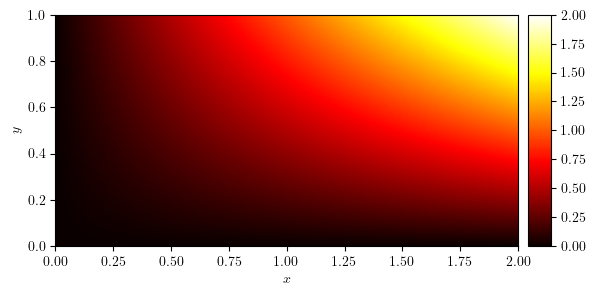

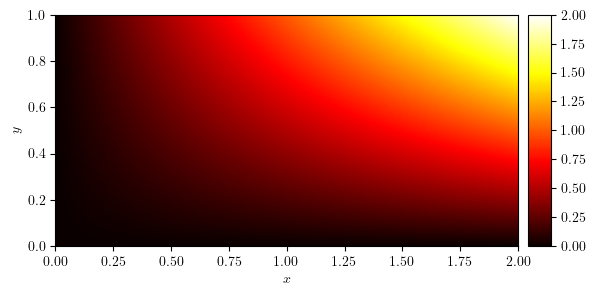

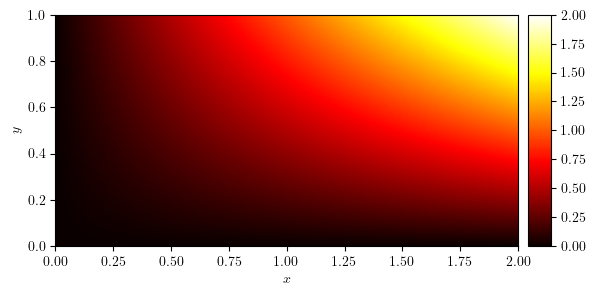

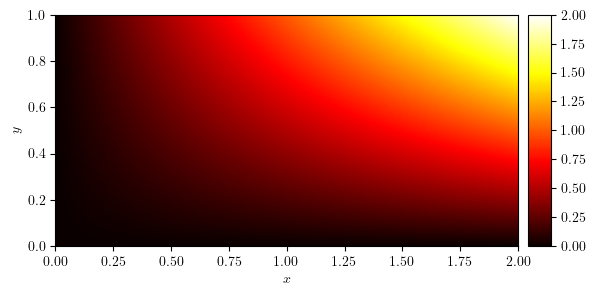

In [3]:
x, y = grid(mesh)

use_map_options = (True, False)
jit_options = (True, False)

for use_map in use_map_options:
    for jit in jit_options:
        u_grid = grid(u, jit=jit, use_mesh_map=use_map)
        plot_colormap((x, y, u_grid))